# NAIVE BAYES CLASSIFIER

NBC - works on principles of conditional probability as given by Bayes theorem

Neka je A događaj, P(A) elemnt of [0,1].

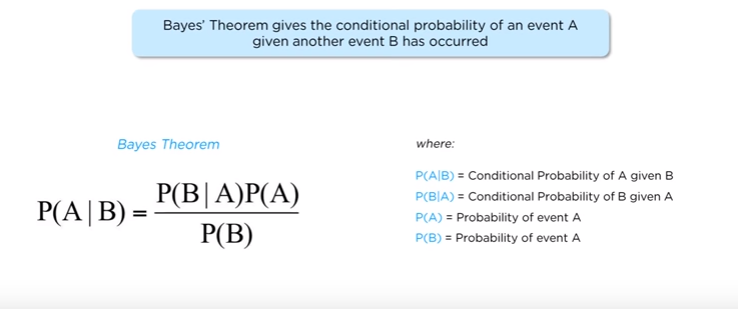

In [2]:
from IPython.display import Image
Image(filename='Pictures/M80.PNG', width=600, height=600)

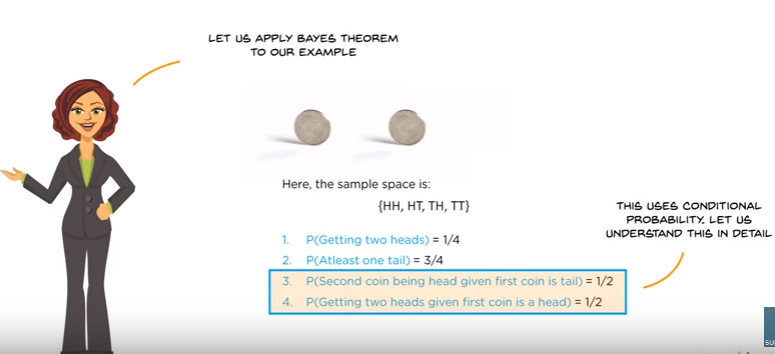

In [3]:
Image(filename='Pictures/M81.PNG', width=600, height=600)

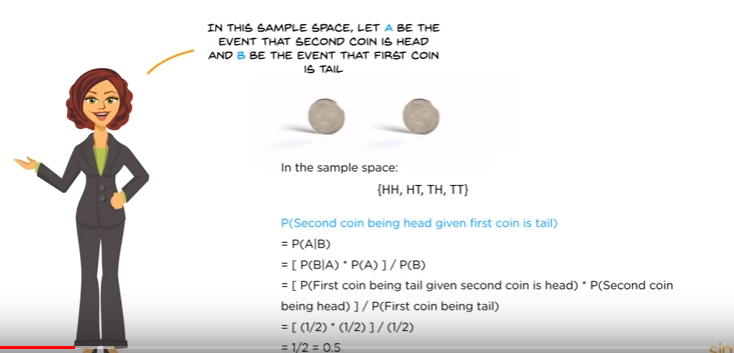

In [4]:
Image(filename='Pictures/M82.PNG', width=600, height=600)

BAYES THEOREM  basically calculates the conditional probability of the occurence of an events based on prior knowlegde of conditions that might be related to the events

ML - SUPERVISED L. - CLASSIFICATION - NAIVE BAYES

Where is used?
1. Face recognition
2. Weather prediction
3. Medical diagnosis
4. News classification - google news (political, global news?)

Example:

Shopping demo - will person buy product or not?

Dayy, discount, free delivery -----> will buy?

https://www.youtube.com/watch?v=l3dZ6ZNFjo0&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=23 - example

P(B)=P(Weekday)=11/30
P(A)=P(No buy)=6/30
P(B|A)=P(Weekday| No buy)=2/6

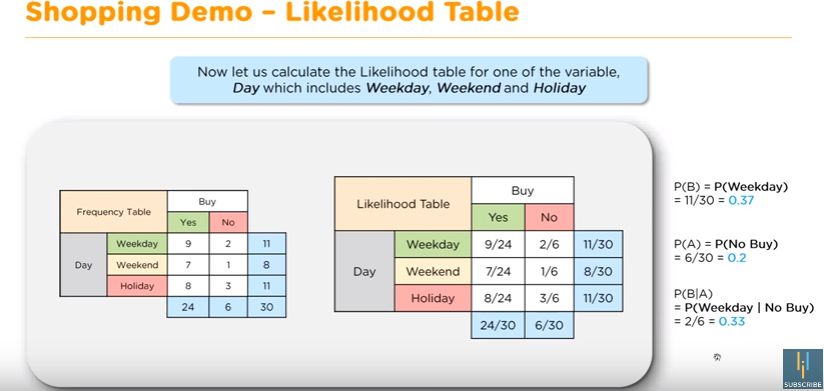

In [5]:
Image(filename='Pictures/M83.PNG', width=600, height=600)

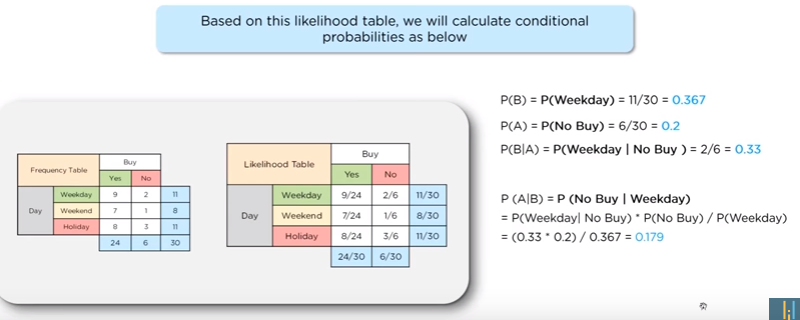

In [6]:
Image(filename='Pictures/M84.PNG', width=600, height=600)

Tables for discount:

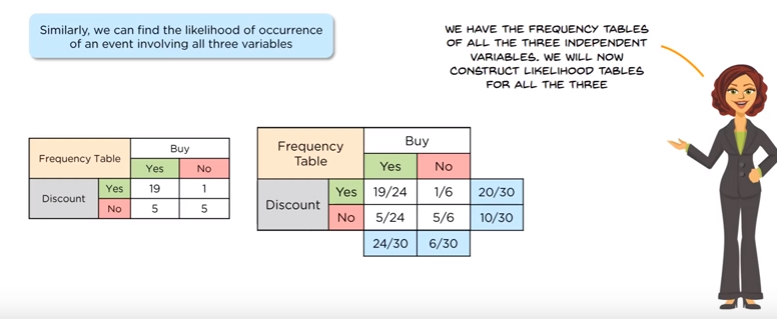

In [7]:
Image(filename='Pictures/M85.PNG', width=600, height=600)

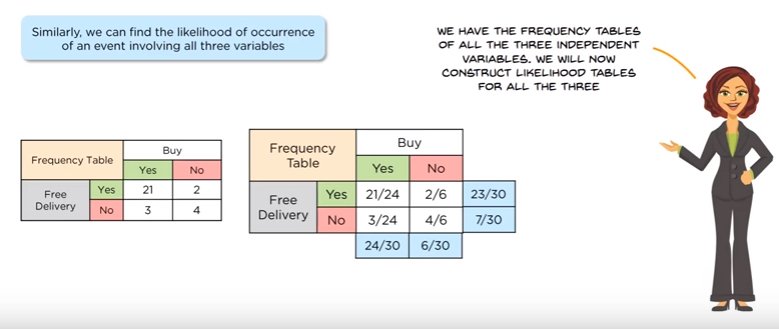

In [9]:
Image(filename='Pictures/M86.PNG', width=600, height=600)

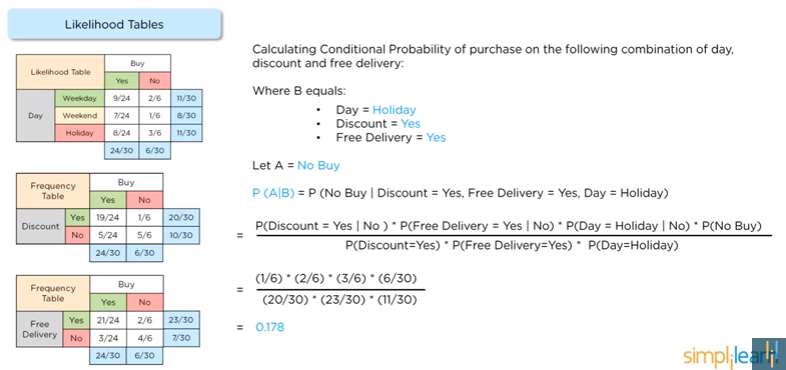

In [10]:
Image(filename='Pictures/M87.PNG', width=600, height=600)

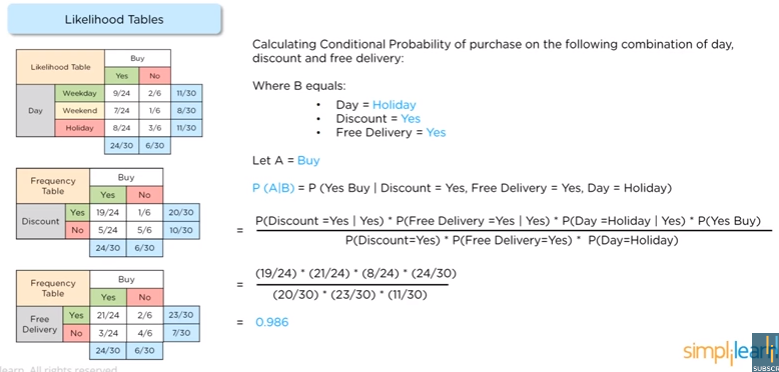

In [11]:
Image(filename='Pictures/M88.PNG', width=600, height=600)

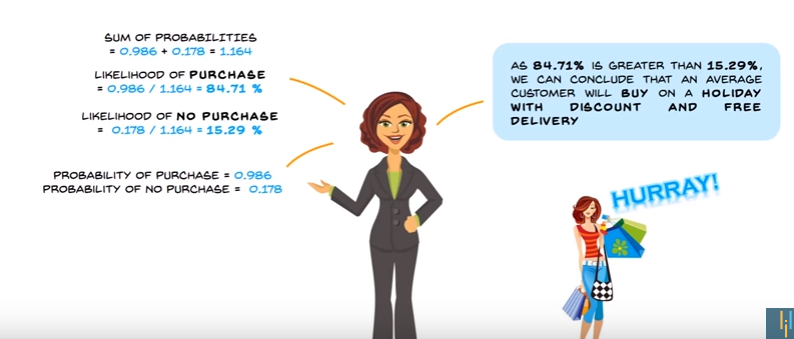

In [12]:
Image(filename='Pictures/M89.PNG', width=600, height=600)

ADVANTAGES:
1. Very simple and easy implement
2. Needs less training data
3. handles both continous and discrete data
4. Highly scalable with number of predictors and data points
5. As it fast it can be used in real time predictions
6. Not sensitive to irrelevant features

EXAMPLE - TEXT CLASSIFICATION

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline

data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [15]:
# Defining all the categories

In [16]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
#training the data on these categories
train=fetch_20newsgroups(subset='train', categories=categories)
#testing data
test=fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5]) #it prints out article! For test is same , but different article

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [19]:
print(len(train.data))

11314


In [20]:
print(len(test.data))

7532


We wanna know in which category article is in based on theme in it.

Multinomial Naive Bayes - for words and text

In [23]:
# Importin necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [25]:
#creating a model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
#TfidfVectorizer() - weighing diff words in the documnt - a word that is in every
# mail - small weight - words like criminal or gun - heavy weight
#make_pipeline - get data from TfidfVectorizer() - pipeline 
# way of organising data
#Training a model with the train data
model.fit(train.data,train.target)
#creating labels for the test data
labels = model.predict(test.data)

1. Train data going into TfidfVectorizer() - it weights all the words in there
2. Based on weight inputs them into MultinomialNB()
3. These are the answers - train.target
4. then after training model we wanna predict a answer
5. So we take test.data - we didnt train that data an we wanna see how close our trained data is!!


Text(89.133125, 0.5, 'predicted label')

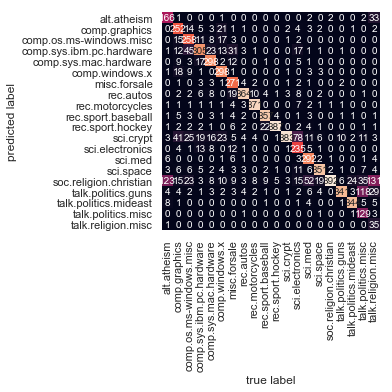

In [26]:
#create a confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target, labels)# test data!!! and predicted data
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names,
           yticklabels=train.target_names)
# sns sits on top of the pyplot
#plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [27]:
#line at diagonal - prediction and true comes together
#we wanna know what is accuracy?

In [28]:
#predicting category on new data based on training model
def predict_category(s, train=train, model=model): # s- string
    pred = model.predict([s])#string will push with pipeline! - calculate weight and put thorugh NB
    return train.target_names[pred[0]]

In [29]:
predict_category('Jesus christ')

'soc.religion.christian'

In [30]:
predict_category('Icecream')

'rec.sport.hockey'

In [31]:
predict_category('BMW is better then Mercedes')

'rec.autos'

In [32]:
predict_category('President od Croatia')

'talk.politics.misc'

In [33]:
predict_category('goint to space')

'sci.space'